# Исследование данных о продажах игр в интернет-магазине


Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

Задача проекта - изучить данные о продажах, сформулировать рекомендации для кампании на будущий год. Для этого выполнить шаги:

**Шаг 1. Открыть файл с данными и изучить общую информацию**

**Шаг 2. Подготовка данных**

**Шаг 3. Исследовательский анализ данных**

**Шаг 4. Составить портрет пользователя каждого региона**

**Шаг 5. Проверка гипотез**

**Шаг 6. Общий вывод**

### Файл с данными и общая информация. 

In [1]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from scipy import stats as st

pd.set_option('chained_assignment', None)

In [2]:
#прочитаем файл с данными и сохраним в переменную

data = pd.read_csv('/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Описание данных:**

* Name — название игры

* Platform — платформа

* Year_of_Release — год выпуска

* Genre — жанр игры

* NA_sales — продажи в Северной Америке (миллионы проданных копий)

* EU_sales — продажи в Европе (миллионы проданных копий)

* JP_sales — продажи в Японии (миллионы проданных копий)

* Other_sales — продажи в других странах (миллионы проданных копий)

* Critic_Score — оценка критиков (максимум 100)

* User_Score — оценка пользователей (максимум 10)

* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [4]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


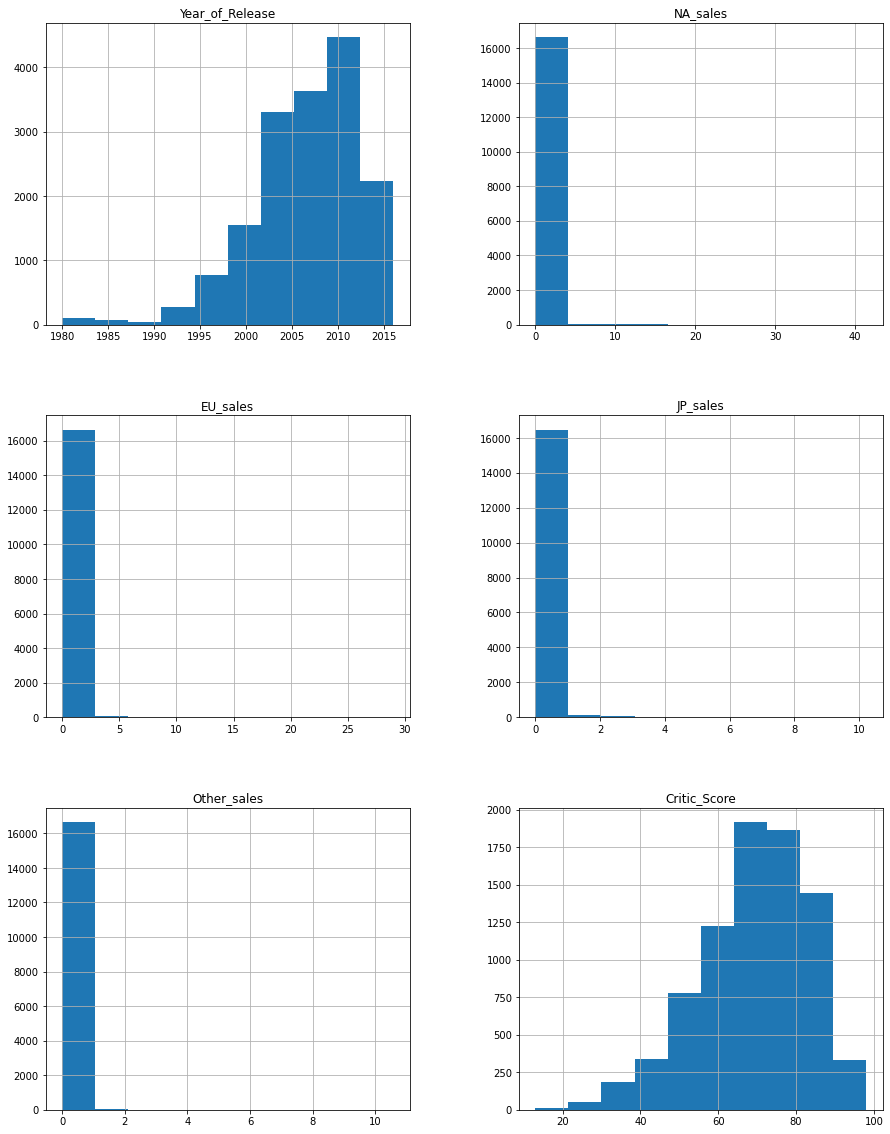

In [6]:
data.hist(figsize=(15, 20));

### Предобработка данных

In [7]:
#приведём названия столбцов к нижнему регистру

data.columns = data.columns.str.lower()

In [8]:
#подсчитаем количество пропусков в таблице

data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
#подсчёт процента числа пропусков

round(data.isna().sum() * 100 / len(data), 2)

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

Видно большое числое пропусков в оценках и рейтинге, их оставляем как есть. Замена на среднее или медианное значение может исказить данные. Остальные строки с пропусками сбросим.

In [10]:
#сбрасываем строки с пропусками в жанре, году релиза и названии, т.к. их в сумме менее 2%

data = data.query('~year_of_release.isna() and ~name.isna() and ~genre.isna()')

In [11]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [12]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [13]:
data.user_score.unique()

96

В столбце пользовательских оценок видно значение tbd - to be determined. На момент выгрузки данные об оценках были ещё не собраны, заменим их на маркер.

In [546]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [547]:
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [548]:
#тип столбцов с оценками и продажами приводим к дробному

for i in data.columns[4:10]:
    data[i] = data[i].astype('float32')

In [549]:
#год выхода приводим к целому

data['year_of_release'] = data['year_of_release'].astype('int32')

In [550]:
data.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float32
eu_sales           float32
jp_sales           float32
other_sales        float32
critic_score       float32
user_score         float32
rating              object
dtype: object

In [551]:
#добавим столбец с суммарными продажами регионов

data['sales_all'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,NaN,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,NaN,31.380001


In [552]:
data = data.fillna('undef')

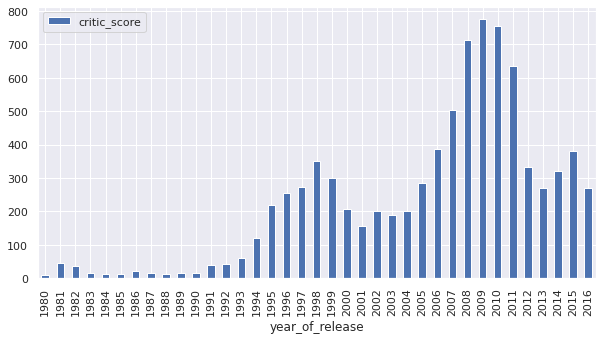

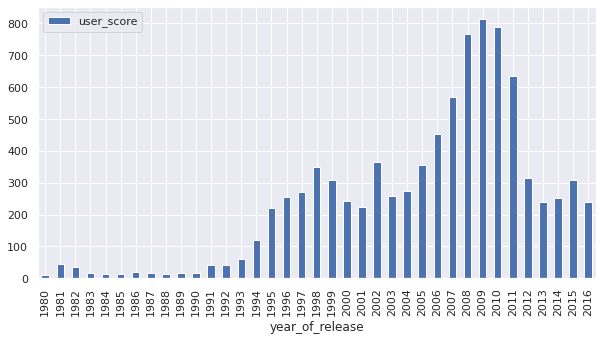

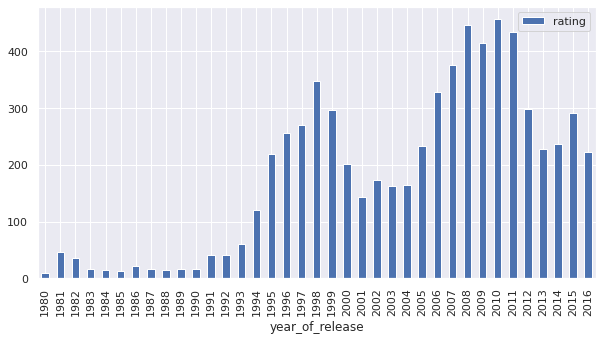

In [553]:
#распределение пропусков по годам

for i in data.columns[8:11]:
    (data[data[i]=='undef']     
     .pivot_table(index='year_of_release', values=i, aggfunc='count')
     .plot(kind='bar',figsize=(10,5))
    )

Распределение для рейтингов и оценок выглядит одинаково. Пропуски в основном приходятся на период игрового бума, когда выходило наибольшее число игр, вероятно, поэтому не все игры оценили и ранжировали.

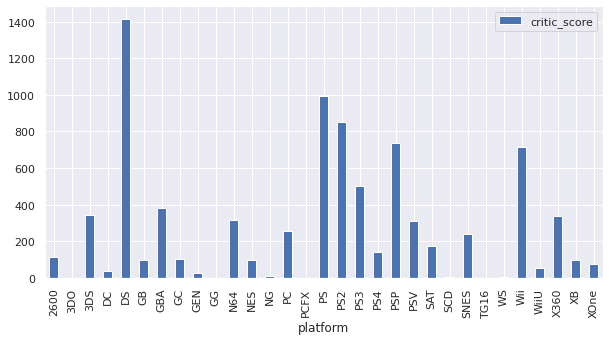

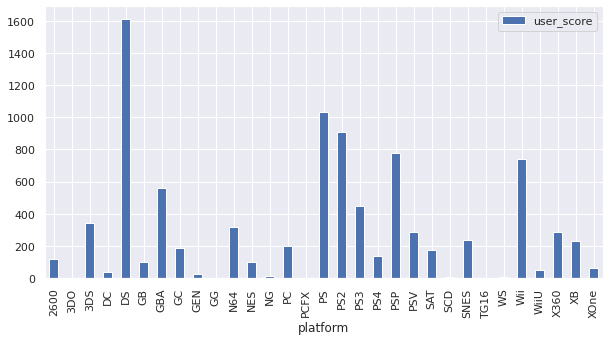

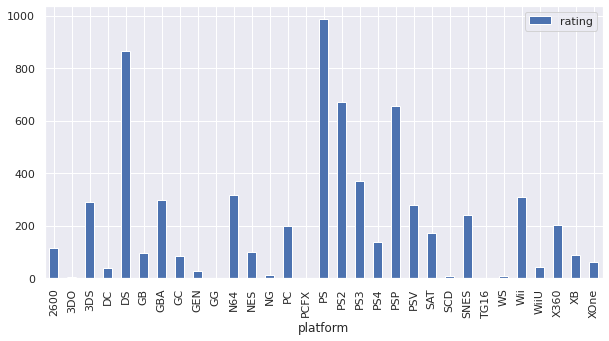

In [554]:
#распределение пропусков по платформам

for i in data.columns[8:11]:
    (data[data[i]=='undef']     
     .pivot_table(index='platform', values=i, aggfunc='count')
     .plot(kind='bar',figsize=(10,5))
    )

Видно, что пропуски в основном относятся к японским платформам. Можно предположить, что рейтинг присваивался по другой системе, не ESRB, а оценки в англоязычных источниках отсутствуют.

In [555]:
#пропуски по регионам

data_long = pd.melt(data, id_vars=['rating','user_score','critic_score'], \
                    value_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], \
                    var_name='region', value_name='sales')

data_long.pivot_table(index='region',  values = 'sales',  aggfunc='sum')

,sales
region,
eu_sales,2399.679996
jp_sales,1290.639998
na_sales,4341.419999
other_sales,782.629997


In [597]:
pd.melt(data, id_vars=['rating'], value_vars=['na_sales','eu_sales','jp_sales','other_sales'],
                    var_name='region')[lambda x : x['value'] > 0].groupby('region')['rating'].value_counts(normalize=True)


region       rating
eu_sales     undef     0.279921
             E         0.264188
             T         0.224480
             M         0.134388
             E10+      0.096366
             K-A       0.000281
             EC        0.000187
             AO        0.000094
             RP        0.000094
jp_sales     undef     0.643880
             T         0.136719
             E         0.092448
             M         0.088542
             E10+      0.038249
             K-A       0.000163
na_sales     E         0.308212
             undef     0.249104
             T         0.216507
             M         0.116465
             E10+      0.108795
             EC        0.000667
             K-A       0.000167
             AO        0.000083
other_sales  E         0.286576
             undef     0.253617
             T         0.217042
             M         0.128818
             E10+      0.113143
             EC        0.000502
             AO        0.000100
             K-A    

Видно, что в смысле долей у Японии продаж для игр без рейтинга больше всего.

### Исследование данных

Text(0, 0.5, 'count')

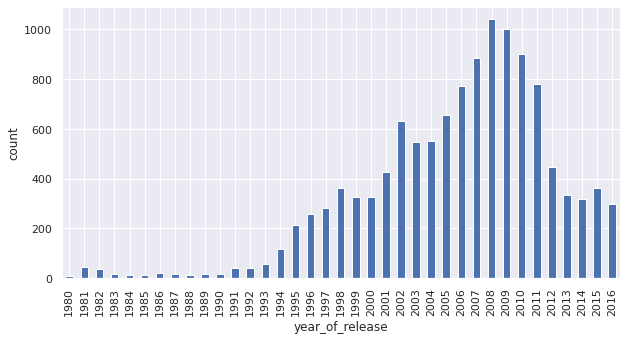

In [558]:
#оценим число вышедших игр по годам

data.groupby('year_of_release')['name'].nunique().plot(kind='bar',figsize=(10,5))

plt.ylabel('count')

Видно, что наибольшее число игр выходило в период с 2002 по 2011 годы. Данные до 1994 года вряд ли стоит учитывать.

#### Продажи в зависимости от платформы

Text(0, 0.5, 'sales_all')

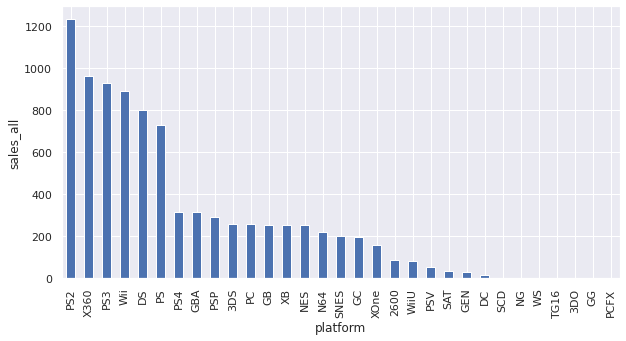

In [559]:
#подсчитаем суммарные продажи по платформам

(data
 .groupby('platform')['sales_all']
 .agg('sum')
 .sort_values(ascending=False)
 .plot(kind='bar',figsize=(10,5))
)

plt.ylabel('sales_all')

Явно выделяются платформы PS2, X360, PS3, Wii, DS, PS. Рассмотрим их подробнее.

In [560]:
top6 = ['PS2','X360','PS3','Wii','DS','PS']

Text(0, 0.5, 'sales')

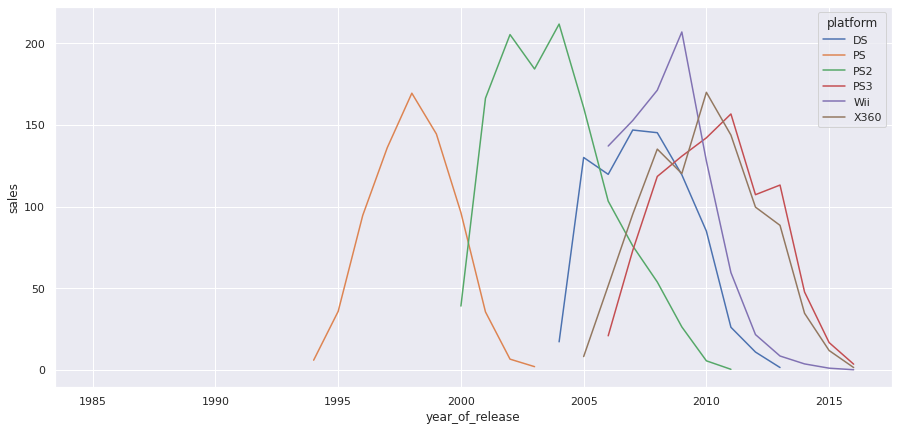

In [561]:
(data
 .query('platform in @top6')
 .pivot_table(index = 'year_of_release', columns = 'platform', values= 'sales_all', aggfunc = 'sum')
 .plot(figsize = (15,7))
)

plt.ylabel('sales')

Исходя из картины видно, что пик продаж находится примерно в промежутке пяти лет. Таким образом, можно предположить, что актуальность платформы также составляет около 5 лет.

Text(0, 0.5, 'sales')

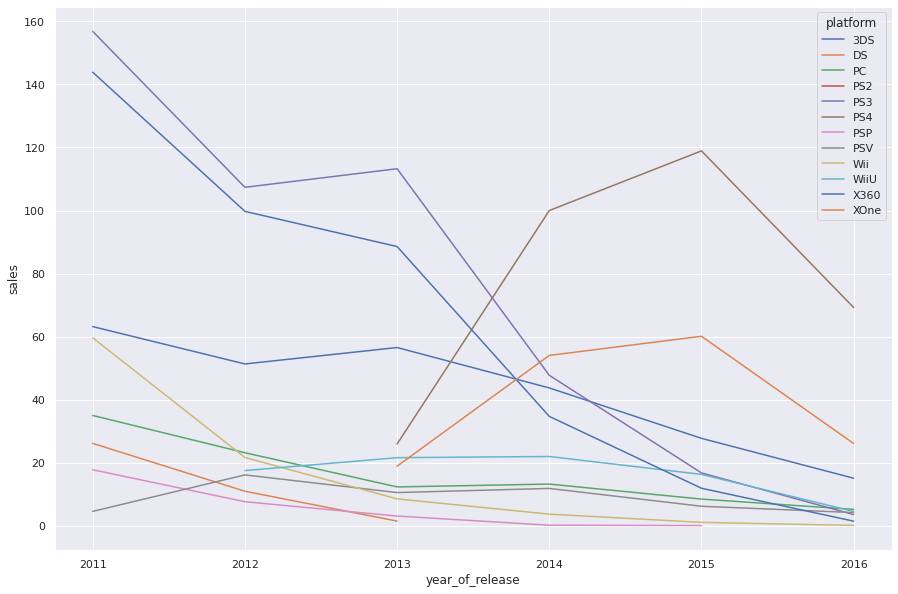

In [562]:
(data
 .query('year_of_release >= 2011')
 .pivot_table(index = 'year_of_release', columns = 'platform', values= 'sales_all', aggfunc = 'sum')
 .plot(figsize = (15,10))
)

plt.ylabel('sales')

Актуальный период возьмем с 2013г. Можно предположить, что актуальными платформами в 2017 году будут оставаться XOne, PS4, 3DS. Также относительно стабильными остаются продажи на PC, PSV. Продажи на остальных снижаются и скорее всего продолжат и в 2017 году, так что вряд ли стоит делать ставку на них.

(0.0, 10.0)

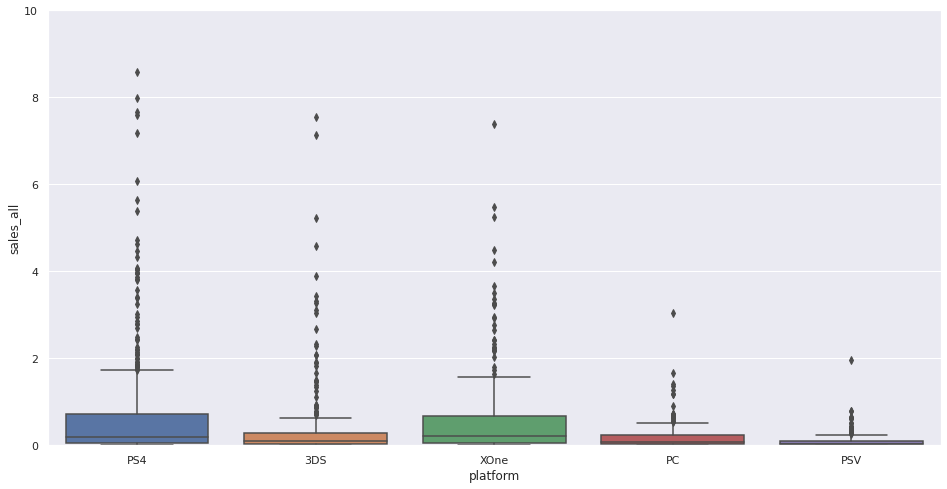

In [563]:
platform_act = ['XOne', 'PS4', '3DS', 'PC', 'PSV']

sns.set(rc = {'figure.figsize':(16,8)})

sns.boxplot(data=data.query('platform in @platform_act and year_of_release >=2013'), x='platform', y='sales_all')

plt.ylim(0,10)

Видно, что у всех платформ межквартильный размах находится до 1 млн. копий. У PS4 и XOne мкр шире остальных, что, видимо, связано с большим разнообразием покупаемых на них игр. Максимальные значения примерно равны. Для всех платформ характерно большое число выбросов, что можно объяснить, веротно, выходом популярных игр и\или эксклюзивов для конкретной платформы.

#### Взаимосвязь продаж с оценками

In [564]:
data_actual = data.query('year_of_release >= 2013')

In [565]:
# код ревьюера
import numpy as np

data_actual = data_actual.replace({'undef': np.NaN})

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'XOne')

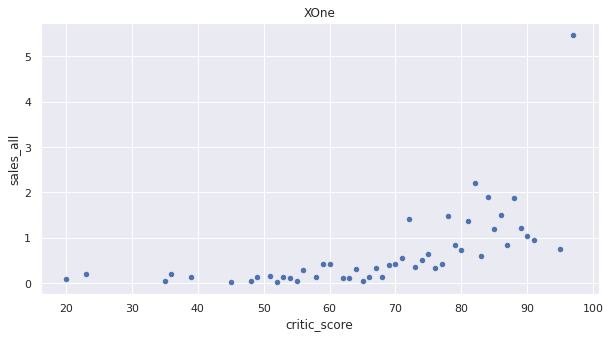

In [566]:
(data_actual
 .query('platform == "XOne"')
 .pivot_table(index='critic_score', values='sales_all')
 .reset_index()
 .plot(x='critic_score', y='sales_all', kind='scatter', grid=True, figsize=(10,5))
)

plt.title('XOne')

In [567]:
(data_actual
 .query('platform == "XOne"')
 .pivot_table(index='critic_score', values='sales_all')
 .reset_index()
 .corr()
)

,critic_score,sales_all
critic_score,1.000000,0.606041
sales_all,0.606041,1.000000


In [568]:
(data_actual
 .query('platform == "XOne"')[['critic_score','sales_all']]
 .corr()
)

,critic_score,sales_all
critic_score,1.000000,0.416998
sales_all,0.416998,1.000000


Присутствует средняя положительная корреляция между оценками критиков и продажами на XOne.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'XOne')

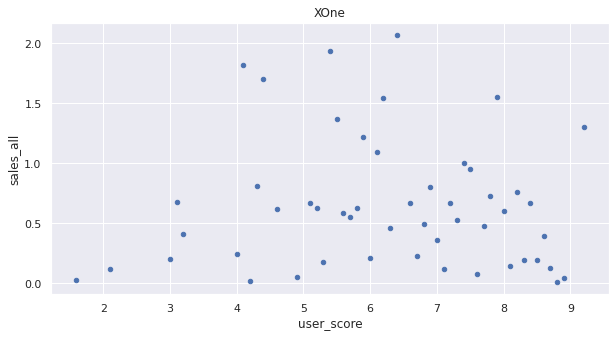

In [569]:
(data_actual
 .query('platform == "XOne"')
 .pivot_table(index='user_score', values='sales_all')
 .reset_index()
 .plot(x='user_score', y='sales_all', kind='scatter',grid=True, figsize=(10,5))
)

plt.title('XOne')

In [570]:
(data_actual
 .query('platform == "XOne"')[['user_score','sales_all']]
 .corr()
)

,user_score,sales_all
user_score,1.000000,-0.068925
sales_all,-0.068925,1.000000


На Xbox One связь продаж с оценками пользователей практически отсутствует.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'PS4')

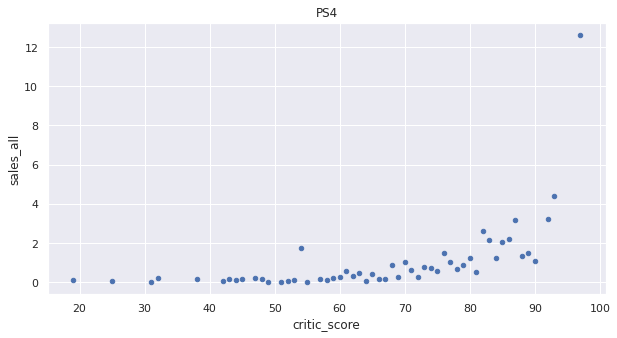

In [571]:
(data_actual
 .query('platform == "PS4"')
 .pivot_table(index='critic_score', values='sales_all')
 .reset_index()
 .plot(x='critic_score', y='sales_all', kind='scatter',grid=True, figsize=(10,5))
)

plt.title('PS4')

In [572]:
(data_actual
 .query('platform == "PS4"')[['critic_score','sales_all']]
 .corr()
)

,critic_score,sales_all
critic_score,1.000000,0.406568
sales_all,0.406568,1.000000


Картина примерно та же, что и у XOne.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'PS4')

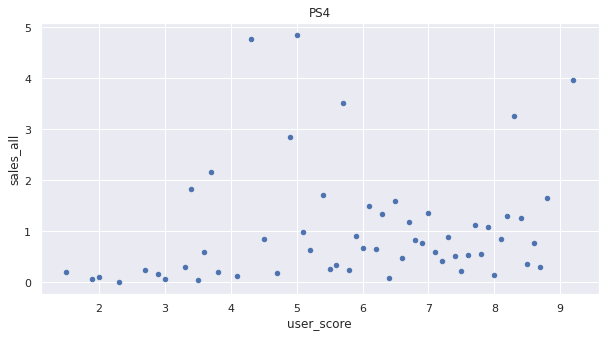

In [573]:
(data_actual
 .query('platform == "PS4"')
 .pivot_table(index='user_score', values='sales_all')
 .reset_index()
 .plot(x='user_score', y='sales_all', kind='scatter',grid=True, figsize=(10,5))
)

plt.title('PS4')

In [574]:
(data_actual
 .query('platform == "PS4"')[['user_score','sales_all']]
 .corr()
)

,user_score,sales_all
user_score,1.000000,-0.031957
sales_all,-0.031957,1.000000


Связь почти отсутствует.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, '3DS')

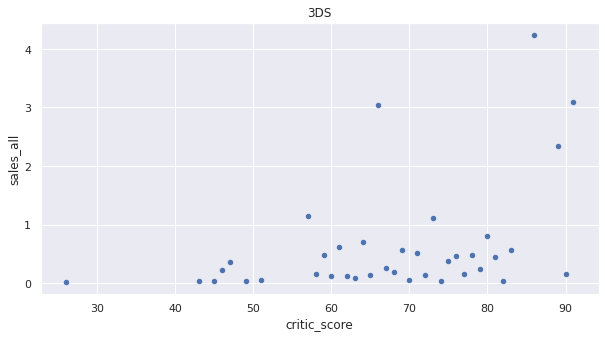

In [575]:
(data_actual
 .query('platform == "3DS"')
 .pivot_table(index='critic_score', values='sales_all')
 .reset_index()
 .plot(x='critic_score', y='sales_all', kind='scatter', grid=True, figsize=(10,5))
)

plt.title('3DS')

In [576]:
(data_actual
 .query('platform == "3DS"')[['critic_score','sales_all']]
 .corr()
)

,critic_score,sales_all
critic_score,1.000000,0.357057
sales_all,0.357057,1.000000


Прямая взаимосвязь с оценками на платформе 3DS критиков присутствует.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, '3DS')

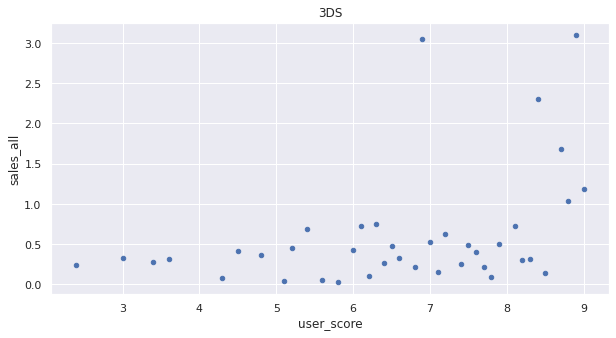

In [577]:
(data_actual
 .query('platform == "3DS"')
 .pivot_table(index='user_score', values='sales_all')
 .reset_index()
 .plot(x='user_score', y='sales_all', kind='scatter',grid=True, figsize=(10,5))
)

plt.title('3DS')

In [578]:
(data_actual
 .query('platform == "3DS"')[['user_score','sales_all']]
 .corr()
)

,user_score,sales_all
user_score,1.000000,0.241504
sales_all,0.241504,1.000000


Прямая взаимосвязь присутствует.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'PC')

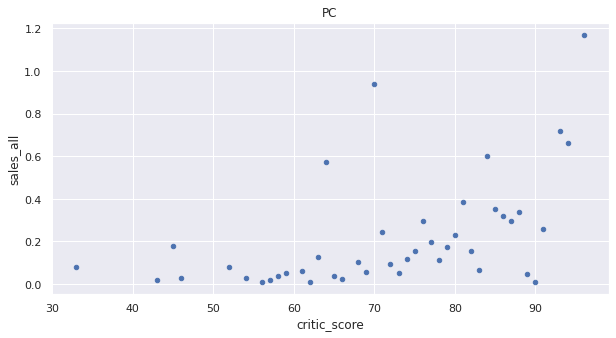

In [579]:
(data_actual
 .query('platform == "PC"')
 .pivot_table(index='critic_score', values='sales_all')
 .reset_index()
 .plot(x='critic_score', y='sales_all', kind='scatter',grid=True, figsize=(10,5))
)

plt.title('PC')

In [580]:
(data_actual
 .query('platform == "PC"')[['critic_score','sales_all']]
 .corr()
)

,critic_score,sales_all
critic_score,1.00000,0.19603
sales_all,0.19603,1.00000


Прямая взаимосвязь присутствует.

Text(0.5, 1.0, 'PC')

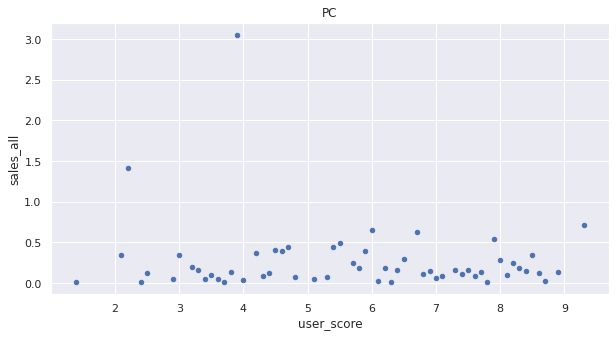

In [581]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

(data_actual
 .query('platform == "PC"')
 .pivot_table(index='user_score', values='sales_all')
 .reset_index()
 .plot(x='user_score', y='sales_all', kind='scatter',grid=True, figsize=(10,5))
)

plt.title('PC')

In [582]:
(data_actual
 .query('platform == "PC"')[['user_score','sales_all']]
 .corr()
)

,user_score,sales_all
user_score,1.000000,-0.093842
sales_all,-0.093842,1.000000


Взаимосвязь практически отсутствует.

#### Исследование продаж по жанрам

Text(0, 0.5, 'sales_all')

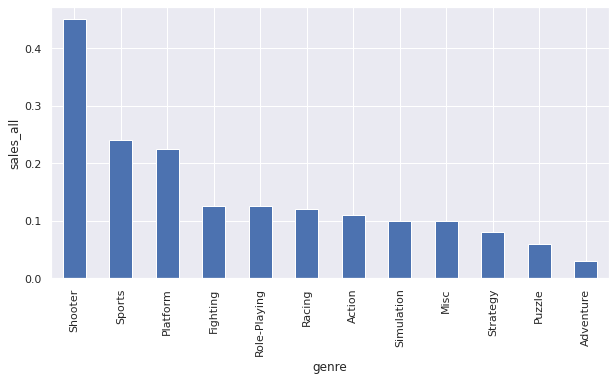

In [583]:
data_actual.groupby('genre')['sales_all'].agg('median').sort_values(ascending=False).plot(kind='bar',figsize=(10,5))

plt.ylabel('sales_all')

Самый интересный жанр - шутеры. Далее следуют спортивные игры, платформеры. Менее популярны файтинги, ролевые, гонки,  экшены, симуляторы и т.д.

### Портрет пользователя

In [584]:
for i in data.columns[4:8]:
    (display(data_actual
     .pivot_table(index='platform', values=i, aggfunc='sum')
     .reset_index()
     .nlargest(5,columns=i)
            ))

,platform,na_sales
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.20


,platform,eu_sales
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.96


,platform,jp_sales
0,3DS,67.81
3,PS3,23.35
6,PSV,18.59
4,PS4,15.96
8,WiiU,10.88


,platform,other_sales
4,PS4,48.35
3,PS3,26.77
10,XOne,14.27
9,X360,12.11
0,3DS,6.28


В США и Японии предпочитают играть на своих "домашних" платформах Xbox 360 и PS соответственно. Также в Японии довольно распространены портативные консоли: PSP, PSV, 3DS. В Европе и других странах доля PS больше, чем у Xbox. В Европе также предпочитают играть и на ПК.

In [585]:
for i in data.columns[4:8]:
    (display(data_actual
     .pivot_table(index='genre', values=i, aggfunc='median')
     .reset_index()
     .nlargest(5,columns=i)
            ))

,genre,na_sales
8,Shooter,0.200
4,Platform,0.090
10,Sports,0.080
2,Fighting,0.045
6,Racing,0.030


,genre,eu_sales
8,Shooter,0.190
4,Platform,0.080
6,Racing,0.060
10,Sports,0.050
9,Simulation,0.035


,genre,jp_sales
7,Role-Playing,0.05
2,Fighting,0.03
3,Misc,0.02
5,Puzzle,0.02
0,Action,0.01


,genre,other_sales
8,Shooter,0.050
4,Platform,0.025
10,Sports,0.020
0,Action,0.010
2,Fighting,0.010


Жанровые предпочтения в США, Европе и других странах, в целом, совпадают. В Японии больше всего любят ролевые игры.

In [598]:
data_actual.rating.value_counts(normalize=True)

undef    0.437528
M        0.165249
T        0.149127
E        0.135244
E10+     0.112853
Name: rating, dtype: float64

In [587]:
data_actual.rating.isna().sum()

977

In [588]:
data_actual['rating'] = data_actual['rating'].fillna('undef')

In [589]:
def fig_plot (col):
    return (data_actual                    
                     .groupby('rating')[col]
                     .agg('sum')
                     .plot(title=col,kind='bar')
                    )

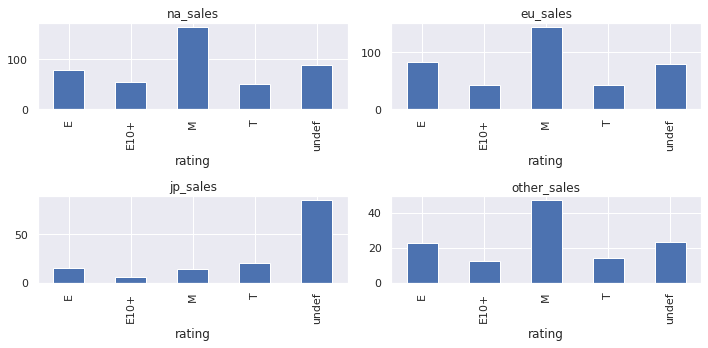

In [590]:
fig = plt.figure(figsize=(10,5))

plt.subplot(2, 2, 1)
fig_plot('na_sales')

plt.subplot(2, 2, 2)
fig_plot('eu_sales')

plt.subplot(2, 2, 3)
fig_plot('jp_sales')

plt.subplot(2, 2, 4)
fig_plot('other_sales')

plt.tight_layout()


Доли продаж по возрастным категориям в США, Европе и других странах в целом идентичны, а вот в Японии преобладают категории Е и Т, а также игры без рейтинга. Что скорее всего связано с большой распространенностью портативных консолей, на которых в основном играют дети и подростки.

In [591]:
for i in data.columns[4:8]:
    (display(data_actual
     .query('rating =="undef"')
     .pivot_table(index = 'rating', values= i, aggfunc = 'sum')
     .reset_index()
    ))

,rating,na_sales
0,undef,89.42


,rating,eu_sales
0,undef,78.91


,rating,jp_sales
0,undef,85.05


,rating,other_sales
0,undef,23.46


### Проверка гипотез

Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H_0: Оценка пользователей (user_score) платформы Xbox One = оценке пользователей (user_score) платформы PC.

H_a: Оценка пользователей (user_score) платформы Xbox One ≠ оценке пользователей (user_score) платформы PC

Уровень значимости возьмём 1%, т.к выборка достаточно большая, вероятность ошибки первого рода можно уменьшить.

Нулевая гипотеза всегда формулируется со знаком равенства, а альтернативная формулируется так, что она противоречит нулевой. В данном случае, не важно, в какую сторону будут отличаться оценки, поэтому альтернативная гипотеза двухсторонняя. 

In [592]:
data_test = data_actual.query('~user_score.isna()')

alpha = 0.01 #значение уровня значимости

results = st.ttest_ind(  #Поскольку речь идёт о проверке равенства средних двух распределений, используем метод .ttest_ind()
    data_test.loc[data_test.platform == 'XOne', 'user_score'],
    data_test.loc[data_test.platform == 'PC', 'user_score'],
    equal_var = False  
    
)

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.14759597335133473
Не получилось отвергнуть нулевую гипотезу


**Вывод**. Получается, что пользователи платформ XOne и PC похоже оценивают игры.

In [593]:
data_test.loc[data_test.platform == 'XOne', 'user_score'].mean() / data_test.loc[data_test.platform == 'PC', 'user_score'].mean()

1.0401537614274121

Разница в средней оценке всего около 4%

Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные.


H_0: Оценка пользователей (user_score) жанра Action = оценке пользователей (user_score) жанра Sports.

H_a: Оценка пользователей (user_score) жанра Action ≠ оценке пользователей (user_score) жанра Sports.

Уровень значимости 1%


In [594]:
alpha = 0.01 #значение уровня значимости

results = st.ttest_ind(  
    data_test.loc[data_test.genre == 'Action', 'user_score'],
    data_test.loc[data_test.genre == 'Sports', 'user_score'],
    equal_var = False
    
)

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.4460022780745844e-20
Отвергаем нулевую гипотезу


In [595]:
data_test.loc[data_test.genre == 'Action', 'user_score'].mean() / data_test.loc[data_test.genre == 'Sports', 'user_score'].mean()

1.3053396318222348

**Вывод**. Можно предположить, что игроки по-разному оценивают игры в жанре action и sports. Разница в средних оценках более 30%. То есть, скорее всего это две разные аудитории.

### Общий вывод

Был изучен набор данных интернет-магазина «Стримчик» — о продажа игр по всему миру за 2016 год.

В процессе проведена предобработка данных: где возможно, заполнены пропуски, изменены типы данных в столбцах.

В ходе исследования определены закономерности:

* пик продаж приходится на промежуток в 5 лет;

* актуальные платформы на 2017 год: XOne, PS4, 3DS, PC, PSV;

* продажи положительно коррелируют с оценками критиков, с оценками пользователей связь слабая или практически отсутствует, кроме портативных платформ (3DS) - там положительная связь есть;

* самый популярный жанр - шутеры. Далее следуют спортивные игры, платформеры. Менее популярны файтинги, ролевые, гонки,  экшены, симуляторы и т.д.

Также составлен примерный портрет пользователя из разных регионов:

* В США и Японии предпочитают играть на своих "домашних" платформах Xbox 360 и PS соответственно. Также в Японии довольно распространены портативные консоли: PSP, PSV, 3DS. В Европе и других странах доля PS больше, чем у Xbox. В Европе также предпочитают играть и на ПК.

* Жанровые предпочтения в США, Европе и других странах, в целом, совпадают. Наиболее популярны шутеры, платформеры, экшены, спортивные и ролевые игры. В Японии больше всего любят ролевые игры.

* Доли продаж по возрастным категориям в США, Европе и других странах в целом идентичны, превалирует категория М. В Японии преобладают категории Е и Т. Что скорее всего связано с большой распространенностью портативных консолей, на которых в основном играют дети и подростки.

Проверены гипотезы:

* пользователи платформ XOne и PC похоже оценивают игры. Разница в средних оценках всего около 4%

* игроки по-разному оценивают игры в жанре action и sports. Разница в средних оценках более 30%. То есть, скорее всего это две разные аудитории.